## Домашнее задание №1
**Василенко Анна Ц-22-BMO-SQL/1** 

In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (
    GridSearchCV,
    RepeatedStratifiedKFold,
    cross_validate,
    TunedThresholdClassifierCV,
    FixedThresholdClassifier,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    KFold,
)
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import make_scorer, precision_score
from sklearn import svm
from sklearn.model_selection import StratifiedKFold

### Область работы 2 (поиск  модели .... )

In [ ]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# должен быть понятен и очевиден отбор параметров модели
#
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
#

path_train = "train.csv"  # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
3,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7
4,9.2,0.41,0.50,2.50,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7


In [6]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1294.000000,1294.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1294.000000,1293.000000,1295.000000,1295.000000
mean,8.438872,0.500920,0.298880,2.573398,0.085467,15.362934,44.651351,0.996576,3.303648,0.678415,10.676100,5.937452
std,1.818823,0.182181,0.200443,1.366700,0.045056,10.487662,35.420622,0.001968,0.157238,0.169927,1.174136,0.955717
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.360000,0.120000,1.900000,0.068000,7.000000,20.000000,0.995315,3.200000,0.570000,9.600000,5.000000
50%,8.100000,0.480000,0.310000,2.200000,0.078000,13.000000,34.000000,0.996600,3.300000,0.640000,10.500000,6.000000
75%,9.400000,0.620000,0.455000,2.600000,0.090000,21.000000,57.000000,0.997765,3.390000,0.760000,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


Дубликаты в данных могут привести _к искажению результатов их анализа_, так что избавимся от них, а еще от строк с пропущенными значениями

In [ ]:
display(df[df.duplicated()], df[df.isna().any(axis=1)])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
132,10.4,0.38,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8,7
139,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
142,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
169,13.3,0.29,0.75,2.8,0.084,23.0,43.0,0.99860,3.04,0.68,11.4,7
170,7.3,0.34,0.33,2.5,0.064,21.0,37.0,0.99520,3.35,0.77,12.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1287,11.1,0.31,0.49,2.7,0.094,16.0,47.0,0.99860,3.12,1.02,10.6,7
1290,9.5,0.39,0.41,8.9,0.069,18.0,39.0,0.99859,3.29,0.81,10.9,7
1291,8.5,0.34,0.40,4.7,0.055,3.0,9.0,0.99738,3.38,0.66,11.6,7
1292,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
637,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,NaN,11.0,4
698,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
720,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5
1146,7.2,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


In [8]:
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.dropna()
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
3,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7
4,9.2,0.41,0.50,2.50,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1285,6.8,0.81,0.05,2.00,0.070,6.0,14.0,0.99562,3.51,0.66,10.8,6
1286,5.9,0.46,0.00,1.90,0.077,25.0,44.0,0.99385,3.50,0.53,11.2,5
1288,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
1289,13.5,0.53,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5


Так как перед нами задача классификации, то надо переобозначить данные; _"качественным"_ вином считаем вино с quality больше 7 и переобозначим все такие напитки на класс 1; оставшиеся вина (с качеством меньше 7) сделаем 0 классом. 

In [ ]:
df_cleaned.loc[:, "quality"] = df_cleaned["quality"].map(lambda x: 1 if x >= 7 else 0)
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,0
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,0
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,0
3,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,1
4,9.2,0.41,0.50,2.50,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1285,6.8,0.81,0.05,2.00,0.070,6.0,14.0,0.99562,3.51,0.66,10.8,0
1286,5.9,0.46,0.00,1.90,0.077,25.0,44.0,0.99385,3.50,0.53,11.2,0
1288,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,0
1289,13.5,0.53,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,0


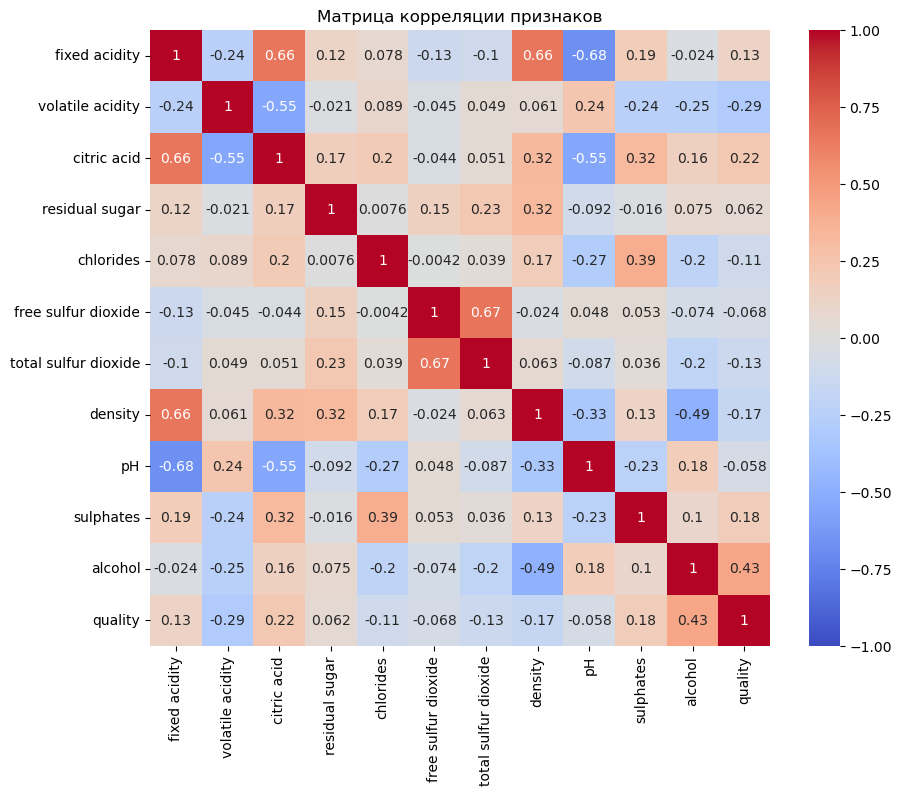

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляции признаков")
plt.show()

На самом деле и невооруженным глазом видно, что между некоторыми признаками есть зависимость, однако не понятно, после какого значения их стоит удалять, поэтому оставим, но будем иметь в виду, что корреляция все же присутствует. 

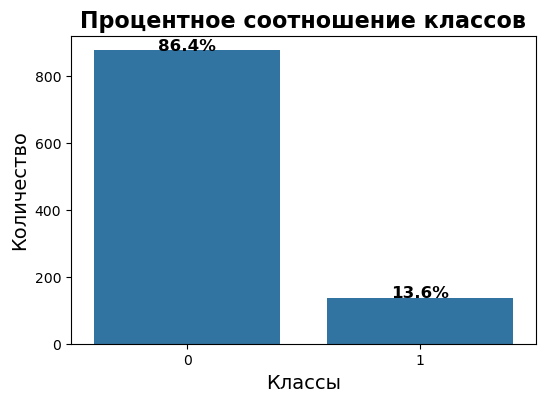

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="quality", data=df_cleaned)

total = len(df_cleaned)

plt.title("Процентное соотношение классов", fontsize=16, fontweight="bold")
plt.xlabel("Классы", fontsize=14)
plt.ylabel("Количество", fontsize=14)

for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(
        f"{percentage:.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="baseline",
        fontsize=12,
        fontweight="bold",
        color="black",
    )

plt.show()

Выглядить страшно, потому что процентное соотношение пугает еще до начала построения моделей...

In [ ]:
X = df_cleaned.drop(["quality"], axis=1)
y = df_cleaned["quality"]

In [13]:
print(X.shape)
print(y.shape)

(1015, 11)
(1015,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

Так как нас интересует только _"качественное"_ вино, то пропуски хорошего вина нас не сильно волнуют, главное, чтобы _купленное оказалось в итоге хорошим_.

`Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными` - то, что надо.

Максимизируем **Precision**

Лучше недоверчиво не взять хорошее вино, чем ошибиться, взять плохое и отравиться!

## Ближайшие соседи

In [ ]:
cv = StratifiedShuffleSplit(test_size=0.25, n_splits=5)

pipe_knn = Pipeline(
    [("preprocessing", StandardScaler()), ("classifier", KNeighborsClassifier())]
)

n_neighbors = [37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48]
p = [1, 2, 3, 4, 5, 6, 7, 8]
weights = ["uniform", "distance"]

param_grid = [
    {
        "preprocessing": [
            MinMaxScaler(),
            StandardScaler(),
            RobustScaler(),
            Normalizer(),
        ],
        "classifier": [KNeighborsClassifier()],
        "classifier__n_neighbors": n_neighbors,
        "classifier__p": p,
        "classifier__weights": weights,
    }
]

precision_scorer = make_scorer(precision_score, zero_division=0)

grid_knn = GridSearchCV(
    pipe_knn,
    param_grid,
    cv=cv,
    scoring=precision_scorer,
    n_jobs=-1,
    return_train_score=True,
)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [37, 38, 39, 40, 41, 42,
                                                      44, 45, 46, 47, 48],
                          'classifier__p': [1, 2, 3, 4, 5, 6, 7, 8],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True,
             scoring=make_scorer(precision_score, response_method='predict', zero_division=0))

In [ ]:
grid_result_knn = (
    pd.DataFrame(grid_knn.cv_results_)
    .sort_values(["rank_test_score", "std_test_score"])
    .T
)
grid_result_knn

,46,54,62,102,110,118,126,166,174,182,...,679,682,683,687,690,691,695,698,699,703
mean_fit_time,0.00518,0.002944,0.002541,0.002401,0.003035,0.002711,0.003474,0.003236,0.003208,0.003961,...,0.00137,0.002678,0.00176,0.001914,0.003113,0.002046,0.001934,0.003726,0.001274,0.002815
std_fit_time,0.00217,0.00121,0.00108,0.00087,0.00092,0.001218,0.001055,0.002004,0.001098,0.001155,...,0.000512,0.000644,0.000753,0.000826,0.000939,0.000716,0.00066,0.001706,0.000111,0.001038
mean_score_time,0.019426,0.016534,0.015235,0.014218,0.016245,0.0179,0.018587,0.015993,0.0179,0.017021,...,0.008414,0.023904,0.015574,0.00961,0.023511,0.016253,0.009046,0.021961,0.012874,0.011146
std_score_time,0.003228,0.005515,0.004912,0.006496,0.004487,0.005401,0.004811,0.004584,0.004209,0.003161,...,0.002036,0.004692,0.006752,0.002867,0.002084,0.005327,0.00394,0.004034,0.005241,0.003707
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,37,37,37,38,38,38,38,39,39,39,...,48,48,48,48,48,48,48,48,48,48
param_classifier__p,6,7,8,5,6,7,8,5,6,7,...,5,6,6,6,7,7,7,8,8,8
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,distance,uniform,uniform,distance,uniform,uniform,distance,uniform,uniform,distance
param_preprocessing,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,Normalizer(),RobustScaler(),Normalizer(),Normalizer(),RobustScaler(),Normalizer(),Normalizer(),RobustScaler(),Normalizer(),Normalizer()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...",...,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi..."


In [75]:
grid_knn.best_params_

{'classifier': KNeighborsClassifier(),
 'classifier__n_neighbors': 37,
 'classifier__p': 6,
 'classifier__weights': 'distance',
 'preprocessing': RobustScaler()}

По личным наблюдениям `best_params_` не всегда выдает те самые `бест парамс`, поэтому просматриваем табличку самостоятельно!

In [ ]:
pipe_best_knn = make_pipeline(
    RobustScaler(), KNeighborsClassifier(n_neighbors=38, p=5, weights="distance")
)
pipe_best_knn.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=38, p=5,
                                      weights='distance'))])

In [ ]:
print(
    "Precision в выбранной модельке:",
    precision_score(y_test, pipe_best_knn.predict(X_test), zero_division=0),
)

Precision в выбранной модельке: 0.7142857142857143


Ради научного интереса посмотри на ROC-AUC

In [ ]:
print(
    "ROC-AUC score:", roc_auc_score(y_test, pipe_best_knn.predict_proba(X_test)[:, 1])
)

ROC-AUC score: 0.8568819308545336


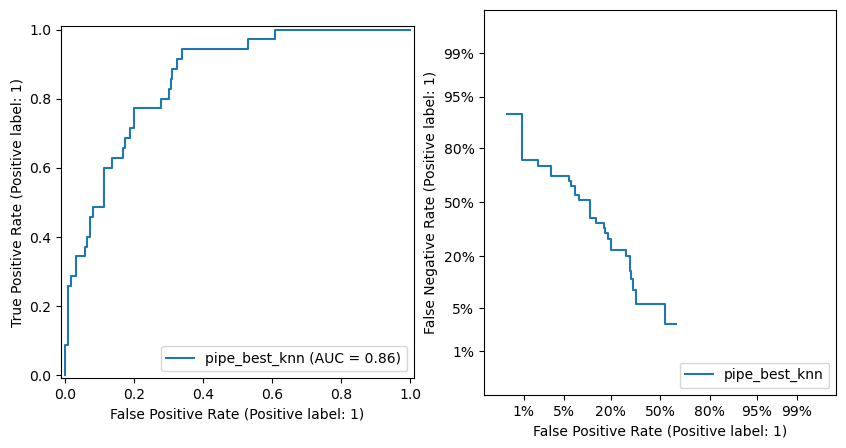

In [ ]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 5))
RocCurveDisplay.from_estimator(
    pipe_best_knn, X_test, y_test, ax=ax_roc, name="pipe_best_knn"
)
DetCurveDisplay.from_estimator(
    pipe_best_knn, X_test, y_test, ax=ax_det, name="pipe_best_knn"
)

`Так как данных не слишком много, а хочется понадежнее поработать с валидацией, используем RepeatedStratifiedKFold для повторного прохождения на уникальных фолдах` - цитата, к действиям из которой стоит прислушаться

Данных и так маловато, а еще и классы несбалансированы...(((



In [ ]:
cv_scores = ["train_precision", "test_precision"]

precision_scorer = make_scorer(precision_score, zero_division=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
cv_results_model_origin_knn = pd.DataFrame(
    cross_validate(
        pipe_best_knn,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_origin_knn[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,1.000,0.000000
test_precision,0.566,0.432442


Попробуем подобрать оптимальный порог для модели

In [ ]:
model_tuned_knn = TunedThresholdClassifierCV(
    estimator=pipe_best_knn, scoring="precision"
)

precision_scorer = make_scorer(precision_score, zero_division=0)

cv_results_model_tuned_knn = pd.DataFrame(
    cross_validate(
        model_tuned_knn,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_tuned_knn[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,1.000000,0.000000
test_precision,0.587429,0.388938


Важно заметить, что после тюнинга порога это все та же модель, так как коэффициенты не изменились! 

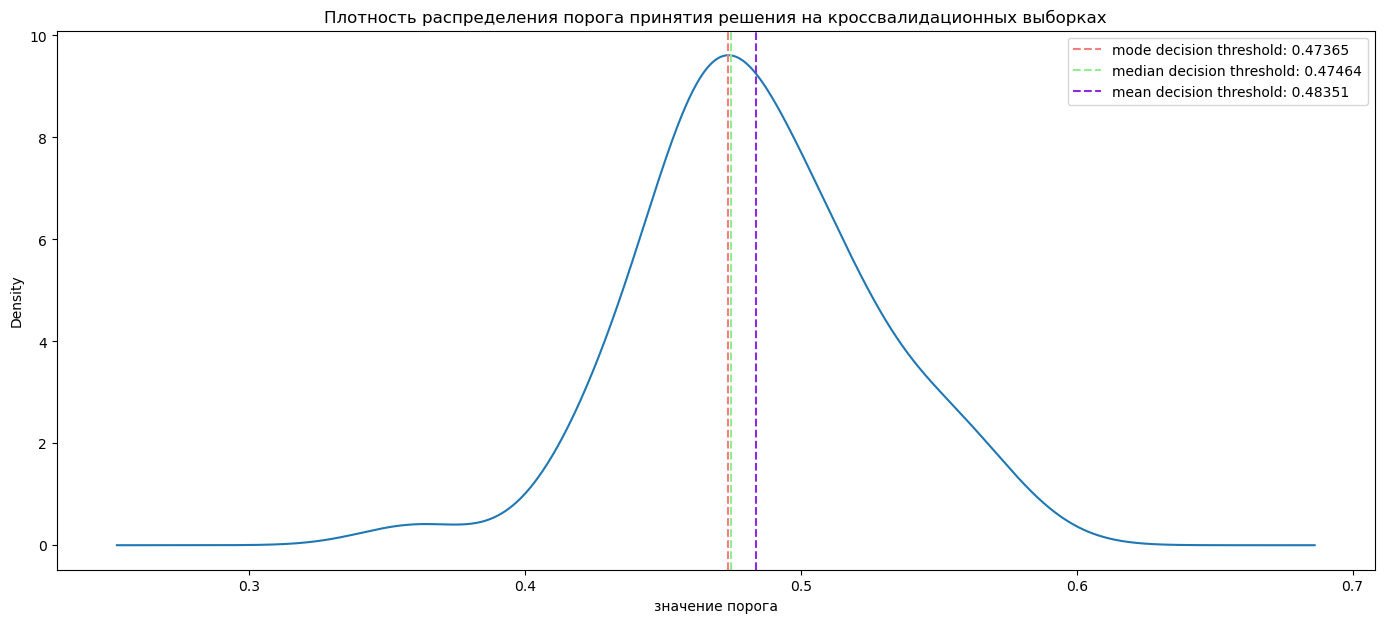

In [ ]:
decision_threshold_knn = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned_knn["estimator"]],
)

fig, ax = plt.subplots(figsize=(17, 7))

ax = decision_threshold_knn.plot.kde(bw_method="silverman")
line = ax.get_lines()
x_plt, y_plt = line[0].get_data()

ths = {
    "mode": [x_plt[np.argmax(y_plt)], "lightcoral"],
    "median": [decision_threshold_knn.median(), "lightgreen"],
    "mean": [decision_threshold_knn.mean(), "blueviolet"],
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках"
)

In [ ]:
ths_final_knn = {
    "origin": 0.5,
    "mode": x_plt[np.argmax(y_plt)],
    "median": decision_threshold_knn.median(),
    "mean": decision_threshold_knn.mean(),
}
comparison_knn = pd.DataFrame()
for key in ths_final_knn:
    final_tune_knn = FixedThresholdClassifier(
        pipe_best_knn, threshold=ths_final_knn[key]
    ).fit(X_train, y_train)
    comparison_knn.loc[key, "train"] = precision_score(
        y_train, final_tune_knn.predict(X_train)
    )
    comparison_knn.loc[key, "test"] = precision_score(
        y_test, final_tune_knn.predict(X_test)
    )

comparison_knn.sort_values(by="test")

,train,test
origin,1.0,0.714286
mean,1.0,0.714286
mode,1.0,0.800000
median,1.0,0.800000


Ну давайте теперь посмотрим метрики для нашей модельки с выбранным порогом! (тут пытаемся выбрать наибольший показатель с наименьшим отклонением трейна от теста)

In [ ]:
final_tune_knn = FixedThresholdClassifier(
    pipe_best_knn, threshold=ths_final_knn["median"]
).fit(X_train, y_train)

In [ ]:
print("Метрики для нашей модели с выбранным порогом")
print(classification_report(y_test, final_tune_knn.predict(X_test)))

Метрики для нашей модели с выбранным порогом
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       219
           1       0.80      0.23      0.36        35

    accuracy                           0.89       254
   macro avg       0.84      0.61      0.65       254
weighted avg       0.88      0.89      0.86       254



Посмотрим, что творится с матрицей ошибок!

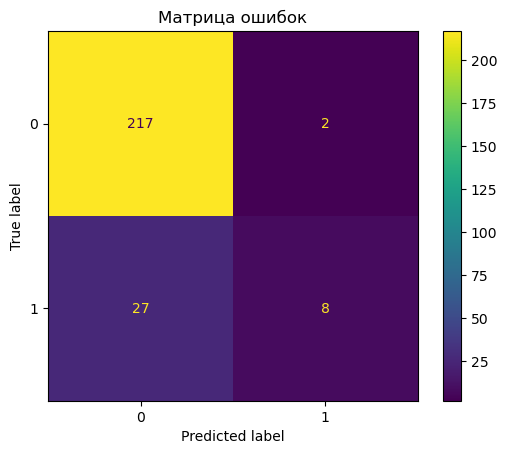

In [ ]:
matrix_knn = confusion_matrix(y_test, final_tune_knn.predict(X_test))

disp_knn = ConfusionMatrixDisplay(confusion_matrix=matrix_knn)

fig, ax = plt.subplots()
disp_knn.plot(
    ax=ax, cmap=plt.cm.viridis, values_format=".0f"
)  # Указываем цветовую карту и формат значений

ax.grid(False)

plt.title("Матрица ошибок")
plt.show()

Проверим модельку на разных выборках для проверки ее рабостоспособности! 

In [ ]:
cv = StratifiedKFold(n_splits=5)
precision_scorer = make_scorer(precision_score, zero_division=0)
scores_knn = cross_val_score(final_tune_knn, X, y, cv=cv, scoring=precision_scorer)
scores_knn

array([0.5       , 0.85714286, 0.5       , 0.5       , 0.66666667])

In [101]:
scores_knn.std()

0.14174167682035443

In [102]:
scores_knn.mean()

0.6047619047619047

На самом деле в методе ближайших соседей всё очень сильно скачет, поэтому не очень круто использовать эту модельку...

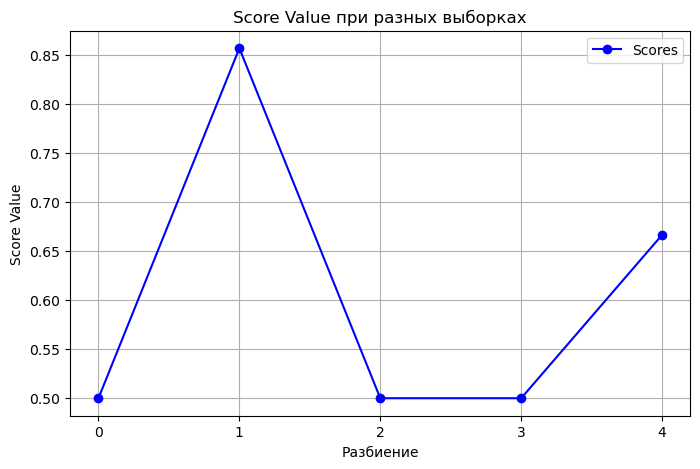

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(
    range(len(scores_knn)),
    scores_knn,
    marker="o",
    linestyle="-",
    color="b",
    label="Scores",
)
plt.title("Score Value при разных выборках")
plt.xlabel("Разбиение")
plt.ylabel("Score Value")
plt.grid(True)
plt.legend()

plt.xticks(ticks=range(len(scores)))

plt.show()

<!-- Более менее норм получилось
pipe_best_knn = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors = 35, p = 5, weights = 'distance'))
pipe_best_knn.fit(X_train,y_train)
final_tune_knn = FixedThresholdClassifier(pipe_best_lr, threshold = 0.53954).fit(X_train, y_train) -->

## Наивный Байес

In [ ]:
pipe_nb = Pipeline([("preprocessing", StandardScaler()), ("clf", GaussianNB())])

cv = StratifiedShuffleSplit(test_size=0.25, n_splits=5)
scaling = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]

param_grid = [{"preprocessing": scaling, "clf": [GaussianNB()]}]

precision_scorer = make_scorer(precision_score, zero_division=0)

grid_nb = GridSearchCV(
    pipe_nb,
    param_grid,
    cv=cv,
    scoring=precision_scorer,
    return_train_score=True,
    n_jobs=-1,
)
grid_nb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('clf', GaussianNB())]),
             n_jobs=-1,
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True,
             scoring=make_scorer(precision_score, response_method='predict', zero_division=0))

In [ ]:
grid_result_nb = (
    pd.DataFrame(grid_nb.cv_results_)
    .sort_values(["rank_test_score", "std_test_score"])
    .T
)
grid_result_nb

,0,1,2,3
mean_fit_time,0.00382,0.003602,0.003032,0.002048
std_fit_time,0.000383,0.001298,0.000408,0.000493
mean_score_time,0.001824,0.001573,0.001245,0.001106
std_score_time,0.000646,0.000648,0.000344,0.000174
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.45,0.45,0.45,0.368421
split1_test_score,0.526316,0.526316,0.526316,0.34375
split2_test_score,0.355556,0.355556,0.355556,0.295455


In [80]:
grid_nb.best_params_

{'clf': GaussianNB(), 'preprocessing': MinMaxScaler()}

In [ ]:
pipe_best_nb = make_pipeline(MinMaxScaler(), GaussianNB())
pipe_best_nb.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('gaussiannb', GaussianNB())])

In [ ]:
print(
    "Precision в выбранной модельке:",
    precision_score(y_test, pipe_best_nb.predict(X_test), zero_division=0),
)

Precision в выбранной модельке: 0.45614035087719296


In [ ]:
print("ROC-AUC score:", roc_auc_score(y_test, pipe_best_nb.predict_proba(X_test)[:, 1]))

ROC-AUC score: 0.860665362035225


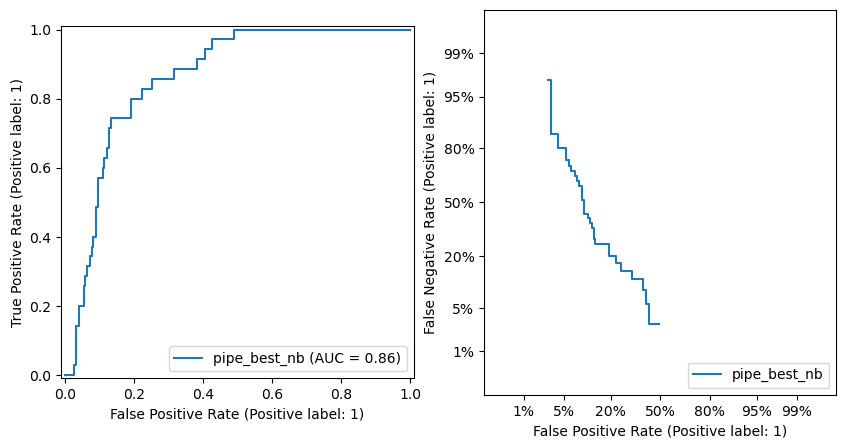

In [ ]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 5))
RocCurveDisplay.from_estimator(
    pipe_best_nb, X_test, y_test, ax=ax_roc, name="pipe_best_nb"
)
DetCurveDisplay.from_estimator(
    pipe_best_nb, X_test, y_test, ax=ax_det, name="pipe_best_nb"
)

In [ ]:
cv_scores = ["train_precision", "test_precision"]

precision_scorer = make_scorer(precision_score, zero_division=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
cv_results_model_origin_nb = pd.DataFrame(
    cross_validate(
        pipe_best_nb,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_origin_nb[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,0.442627,0.016735
test_precision,0.428626,0.070163


Нехило получилось, тюнингуем порожек

In [ ]:
model_tuned_nb = TunedThresholdClassifierCV(estimator=pipe_best_nb, scoring="precision")

precision_scorer = make_scorer(precision_score, zero_division=0)

cv_results_model_tuned_nb = pd.DataFrame(
    cross_validate(
        model_tuned_nb,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_tuned_nb[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,0.313971,0.306707
test_precision,0.289875,0.303454


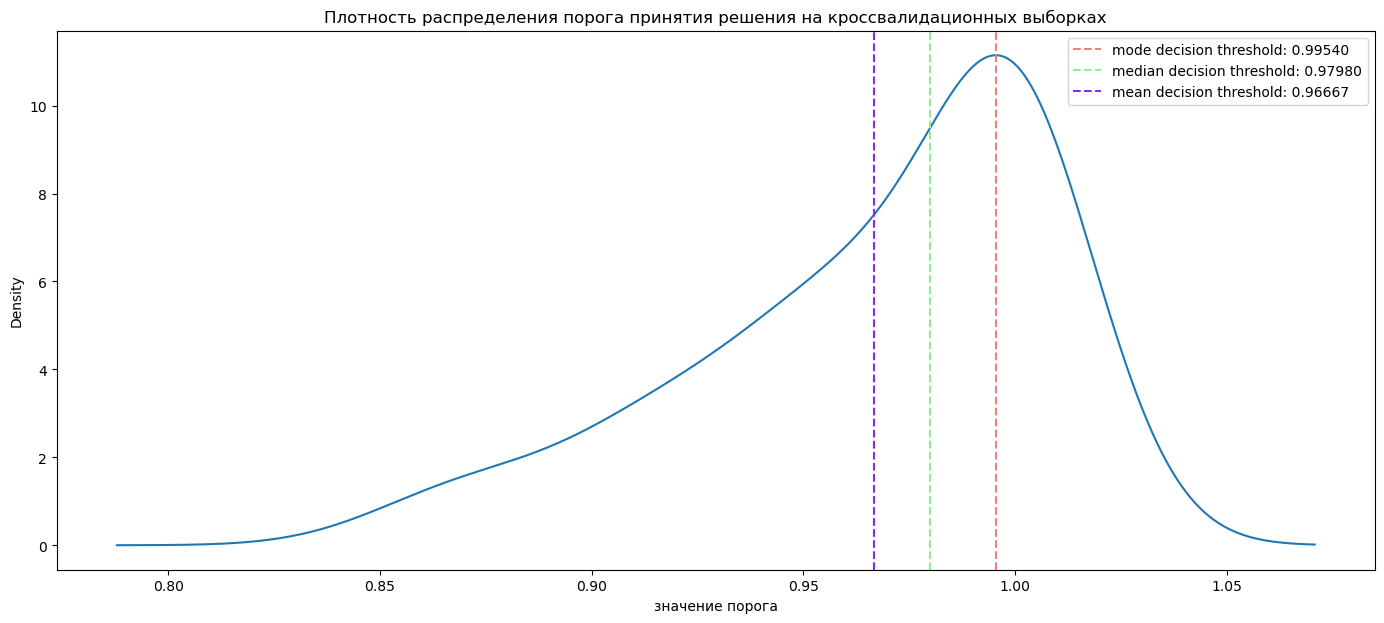

In [ ]:
decision_threshold_nb = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned_nb["estimator"]],
)

fig, ax = plt.subplots(figsize=(17, 7))

ax = decision_threshold_nb.plot.kde(bw_method="silverman")
line = ax.get_lines()
x_plt, y_plt = line[0].get_data()

ths = {
    "mode": [x_plt[np.argmax(y_plt)], "lightcoral"],
    "median": [decision_threshold_nb.median(), "lightgreen"],
    "mean": [decision_threshold_nb.mean(), "blueviolet"],
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках"
)

In [ ]:
ths_final_nb = {
    "origin": 0.5,
    "mode": x_plt[np.argmax(y_plt)],
    "median": decision_threshold_nb.median(),
    "mean": decision_threshold_nb.mean(),
}
comparison_nb = pd.DataFrame()
for key in ths_final_nb:
    final_tune_nb = FixedThresholdClassifier(
        pipe_best_nb, threshold=ths_final_nb[key]
    ).fit(X_train, y_train)
    comparison_nb.loc[key, "train"] = precision_score(
        y_train, final_tune_nb.predict(X_train)
    )
    comparison_nb.loc[key, "test"] = precision_score(
        y_test, final_tune_nb.predict(X_test)
    )

comparison_nb.sort_values(by="test")

,train,test
mode,0.466667,0.000000
median,0.551724,0.222222
mean,0.600000,0.363636
origin,0.441718,0.456140


In [ ]:
final_tune_nb = FixedThresholdClassifier(
    pipe_best_nb, threshold=ths_final_nb["origin"]
).fit(X_train, y_train)

In [ ]:
print("Метрики для нашей модели с выбранным порогом")
print(classification_report(y_test, final_tune_nb.predict(X_test)))

Метрики для нашей модели с выбранным порогом
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       219
           1       0.46      0.74      0.57        35

    accuracy                           0.84       254
   macro avg       0.71      0.80      0.73       254
weighted avg       0.89      0.84      0.86       254



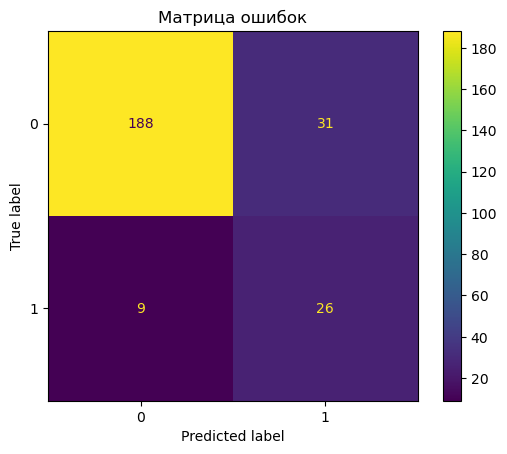

In [ ]:
matrix_nb = confusion_matrix(y_test, final_tune_nb.predict(X_test))

disp_nb = ConfusionMatrixDisplay(confusion_matrix=matrix_nb)

fig, ax = plt.subplots()
disp_nb.plot(
    ax=ax, cmap=plt.cm.viridis, values_format=".0f"
)  # Указываем цветовую карту и формат значений

ax.grid(False)

plt.title("Матрица ошибок")
plt.show()

Байес тоже как-то подкачал, если честно. Показатели не лучшие, но отклонения не колышатся, как в соседях

In [ ]:
cv = StratifiedKFold(n_splits=5)
precision_scorer = make_scorer(precision_score, zero_division=0)
scores_nb = cross_val_score(final_tune_nb, X, y, cv=cv, scoring=precision_scorer)
scores_nb

array([0.36363636, 0.44680851, 0.45      , 0.46666667, 0.44444444])

In [381]:
scores_nb.std()

0.036185114563437516

In [382]:
scores_nb.mean()

0.43431119707715454

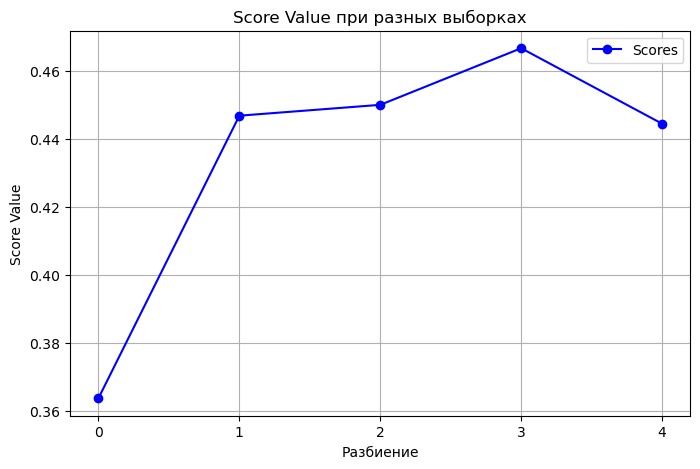

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(
    range(len(scores_nb)),
    scores_nb,
    marker="o",
    linestyle="-",
    color="b",
    label="Scores",
)
plt.title("Score Value при разных выборках")
plt.xlabel("Разбиение")
plt.ylabel("Score Value")
plt.grid(True)
plt.legend()

plt.xticks(ticks=range(len(scores)))

plt.show()

## Логистическая регрессия

In [ ]:
pipe_lr = Pipeline(
    [("preprocessing", StandardScaler()), ("clf", LogisticRegression(max_iter=10000))]
)

cv = StratifiedShuffleSplit(test_size=0.25, n_splits=5)
scaling = [MinMaxScaler(), StandardScaler(), RobustScaler()]

param_grid = [
    {
        "preprocessing": scaling,
        "clf__penalty": ["l2"],
        "clf__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    },
    {"preprocessing": scaling, "clf__penalty": ["l1"], "clf__solver": ["liblinear"]},
    {
        "preprocessing": scaling,
        "clf__penalty": [None],
        "clf__solver": ["lbfgs", "newton-cg"],
    },
    {"preprocessing": scaling, "clf__penalty": ["l1", "l2"], "clf__solver": ["saga"]},
]

precision_scorer = make_scorer(precision_score, zero_division=0)

grid_lr = GridSearchCV(
    pipe_lr,
    param_grid,
    scoring=precision_scorer,
    cv=cv,
    return_train_score=True,
    n_jobs=-1,
)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), Standa...
                                            RobustScaler()]},
                         {'clf__penalty': [None],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]},
                         {'clf__penalty': ['l1', 'l2'], 'clf__solver': ['saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             return_train_score=True,
             scoring=make_scorer(precision_score, response_method='predict', zero_division=0))

In [ ]:
grid_result_lr = (
    pd.DataFrame(grid_lr.cv_results_)
    .sort_values(["rank_test_score", "std_test_score"])
    .T
)
grid_result_lr

,24,16,17,25,26,2,5,11,14,29,...,9,12,27,19,20,21,22,23,15,6
mean_fit_time,0.003896,0.002285,0.004009,0.00935,0.029191,0.006805,0.004589,0.016004,0.025178,0.020243,...,0.003227,0.004866,0.003215,0.002558,0.006258,0.002633,0.003993,0.005902,0.006365,0.00307
std_fit_time,0.000811,0.000416,0.000959,0.005412,0.004784,0.002418,0.001045,0.004569,0.007027,0.004706,...,0.00079,0.002162,0.00135,0.000924,0.000814,0.000579,0.00102,0.002161,0.003212,0.001223
mean_score_time,0.001042,0.001545,0.00135,0.001368,0.001056,0.001522,0.001434,0.001415,0.002172,0.001057,...,0.001982,0.001188,0.00089,0.00189,0.00125,0.000994,0.001641,0.001006,0.001457,0.001267
std_score_time,0.000281,0.000761,0.000615,0.00057,0.000035,0.000443,0.000385,0.000663,0.001295,0.000085,...,0.000641,0.000407,0.00005,0.000864,0.000533,0.000288,0.00088,0.000147,0.000663,0.000491
param_clf__penalty,l1,l1,l1,l1,l1,l2,l2,l2,l2,l2,...,l2,l2,l2,None,None,None,None,None,l1,l2
param_clf__solver,saga,liblinear,liblinear,saga,saga,newton-cg,lbfgs,sag,saga,saga,...,sag,saga,saga,lbfgs,lbfgs,newton-cg,newton-cg,newton-cg,liblinear,liblinear
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler()
params,"{'clf__penalty': 'l1', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...",...,"{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline..."
split0_test_score,0.7,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.555556,0.5
split1_test_score,0.5625,0.473684,0.473684,0.473684,0.473684,0.473684,0.473684,0.473684,0.473684,0.473684,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.571429


In [181]:
grid_lr.best_params_

{'clf__penalty': 'l2',
 'clf__solver': 'liblinear',
 'preprocessing': RobustScaler()}

In [ ]:
pipe_best_lr = make_pipeline(
    MinMaxScaler(), LogisticRegression(solver="saga", penalty="l1")
)
pipe_best_lr.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='saga'))])

In [ ]:
print(
    "Precision в выбранной модельке:",
    precision_score(y_test, pipe_best_lr.predict(X_test), zero_division=0),
)

Precision в выбранной модельке: 0.5


Теперь будем пробовать подбирать параметр C, играющий важную роль в регуляризации модели с целью предотвращения переобучения. Параметр контролирует силу регуляризации. 

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, penalty='l1',
                                    solver='saga'))])


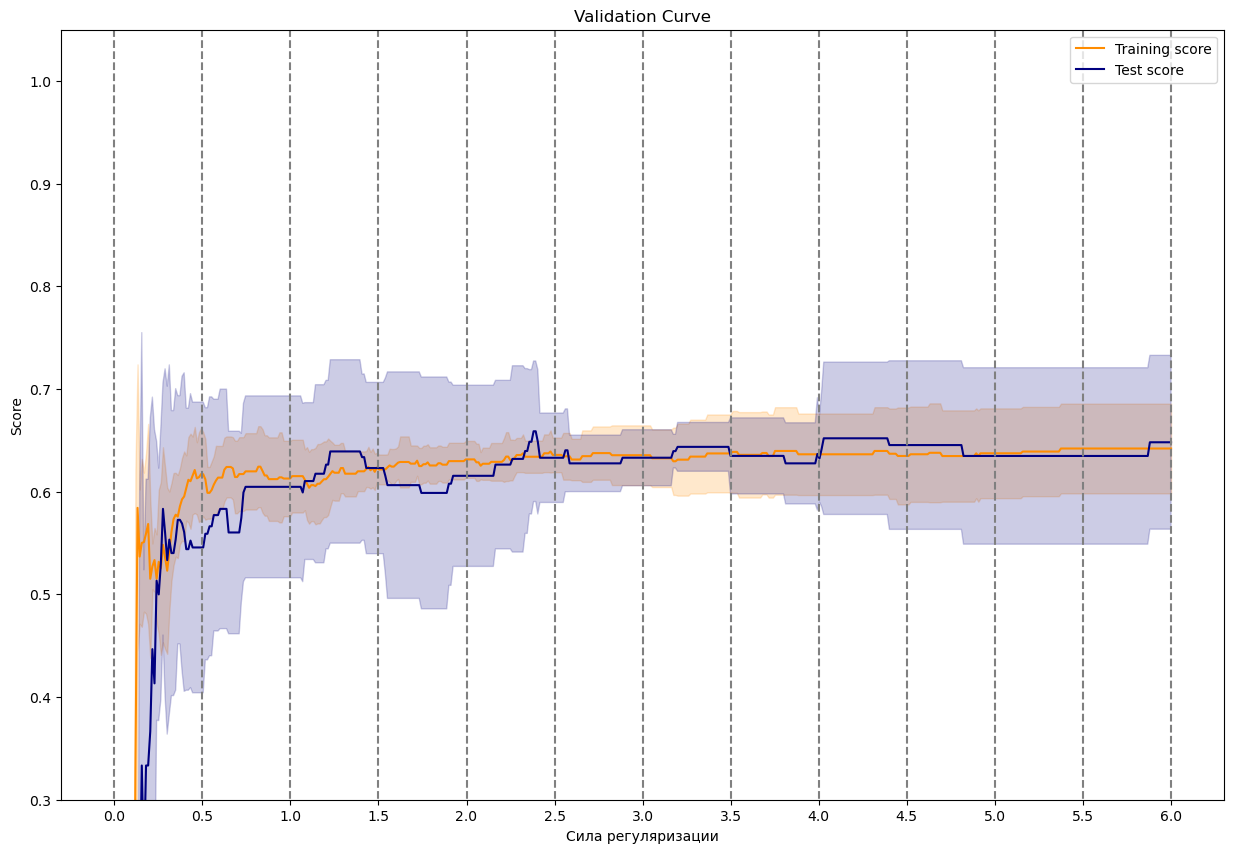

In [ ]:
pipe_fin = make_pipeline(
    MinMaxScaler(), LogisticRegression(solver="saga", penalty="l1", max_iter=10000)
)
print(pipe_fin)

precision_scorer = make_scorer(precision_score, zero_division=0)

from sklearn.model_selection import validation_curve

n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    pipe_fin,
    X_train,
    y_train,
    param_name="logisticregression__C",
    param_range=n_range,
    cv=cv,
    scoring=precision_scorer,
    n_jobs=-1,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))

plt.title("Validation Curve")
plt.xlabel("Сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.3, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(
    n_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
)
plt.plot(n_range, test_scores_mean, label="Test score", color="navy")
plt.fill_between(
    n_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
)

plt.xticks(np.linspace(0, 6, 13))
for i in np.arange(0, 6.5, 0.5):
    plt.vlines(i, 0.2, 1.05, linestyles="dashed", colors="gray")

plt.legend(loc="best")
plt.show()

Тут по графику пытаемся понять, при каком С показатели линии являются самыми близкими друг к другу

In [ ]:
pipe_best_lr = make_pipeline(
    MinMaxScaler(),
    LogisticRegression(solver="saga", penalty="l1", C=0.8, max_iter=10000),
)
pipe_best_lr.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.8, max_iter=10000, penalty='l1',
                                    solver='saga'))])

Теперь посмотрим на порожек

In [ ]:
print(
    "Precision в выбранной модельке:",
    precision_score(y_test, pipe_best_lr.predict(X_test), zero_division=0),
)

Precision в выбранной модельке: 0.5333333333333333


In [ ]:
print("ROC-AUC score:", roc_auc_score(y_test, pipe_best_lr.predict_proba(X_test)[:, 1]))

ROC-AUC score: 0.8675799086757991


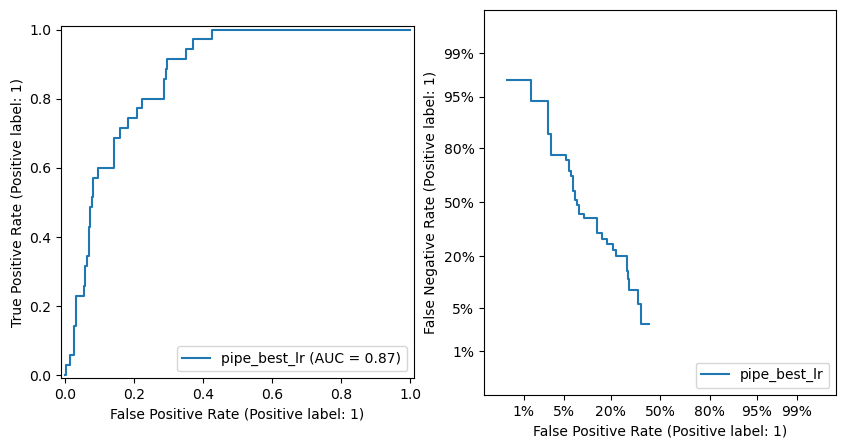

In [ ]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 5))
RocCurveDisplay.from_estimator(
    pipe_best_lr, X_test, y_test, ax=ax_roc, name="pipe_best_lr"
)
DetCurveDisplay.from_estimator(
    pipe_best_lr, X_test, y_test, ax=ax_det, name="pipe_best_lr"
)

In [ ]:
cv_scores = ["train_precision", "test_precision"]

precision_scorer = make_scorer(precision_score, zero_division=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
cv_results_model_origin_lr = pd.DataFrame(
    cross_validate(
        pipe_best_lr,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_origin_lr[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,0.605167,0.036838
test_precision,0.578686,0.146487


In [ ]:
model_tuned_lr = TunedThresholdClassifierCV(estimator=pipe_best_lr, scoring="precision")

precision_scorer = make_scorer(precision_score, zero_division=0)

cv_results_model_tuned_lr = pd.DataFrame(
    cross_validate(
        model_tuned_lr,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_tuned_lr[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,0.627926,0.072484
test_precision,0.536956,0.230866


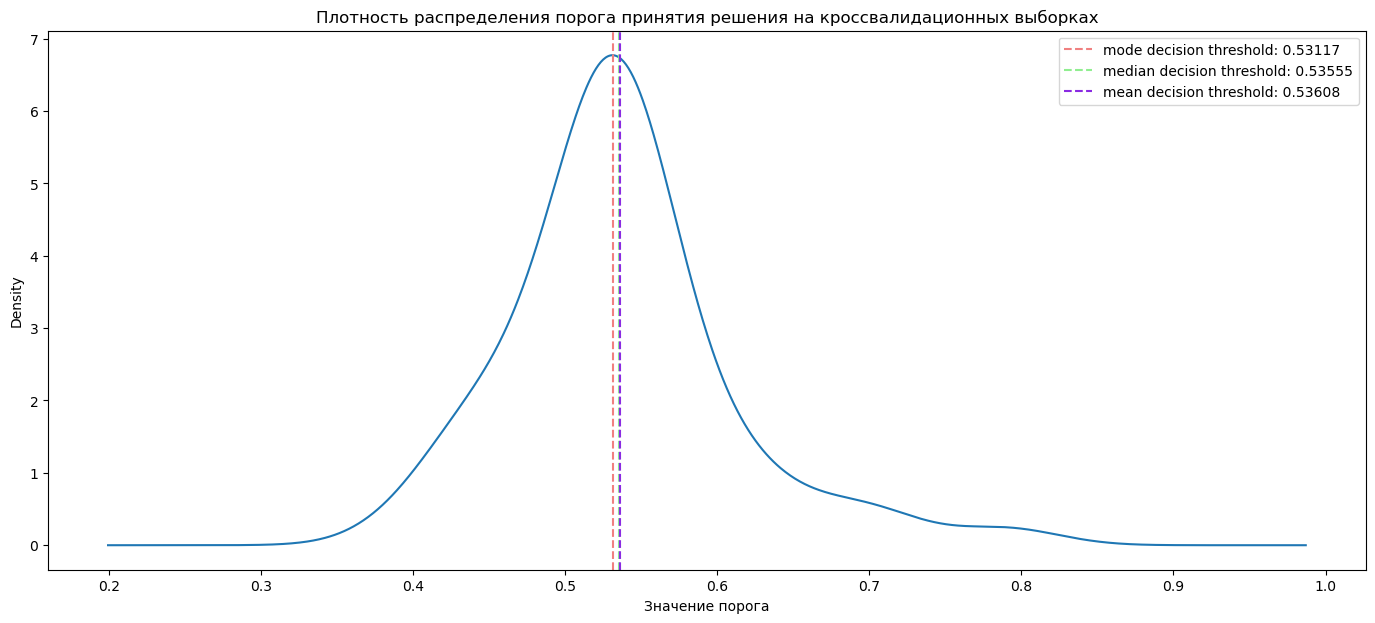

In [ ]:
decision_threshold_lr = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned_lr["estimator"]],
)

fig, ax = plt.subplots(figsize=(17, 7))

ax = decision_threshold_lr.plot.kde(bw_method="silverman")
line = ax.get_lines()
x_plt, y_plt = line[0].get_data()

ths = {
    "mode": [x_plt[np.argmax(y_plt)], "lightcoral"],
    "median": [decision_threshold_lr.median(), "lightgreen"],
    "mean": [decision_threshold_lr.mean(), "blueviolet"],
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("Значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках"
)

In [ ]:
ths_final_lr = {
    "origin": 0.5,
    "mode": x_plt[np.argmax(y_plt)],
    "median": decision_threshold_lr.median(),
    "mean": decision_threshold_lr.mean(),
}
comparison_lr = pd.DataFrame()
for key in ths_final_lr:
    final_tune_lr = FixedThresholdClassifier(
        pipe_best_lr, threshold=ths_final_lr[key]
    ).fit(X_train, y_train)
    comparison_lr.loc[key, "train"] = precision_score(
        y_train, final_tune_lr.predict(X_train)
    )
    comparison_lr.loc[key, "test"] = precision_score(
        y_test, final_tune_lr.predict(X_test)
    )

comparison_lr.sort_values(by="test")

,train,test
mode,0.648649,0.461538
median,0.628571,0.461538
mean,0.628571,0.461538
origin,0.600000,0.533333


In [ ]:
final_tune_lr = FixedThresholdClassifier(
    pipe_best_lr, threshold=ths_final_lr["origin"]
).fit(X_train, y_train)

In [ ]:
print("Метрики для нашей модели с выбранным порогом")
print(classification_report(y_test, final_tune_lr.predict(X_test)))

Метрики для нашей модели с выбранным порогом
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       219
           1       0.53      0.23      0.32        35

    accuracy                           0.87       254
   macro avg       0.71      0.60      0.62       254
weighted avg       0.84      0.87      0.84       254



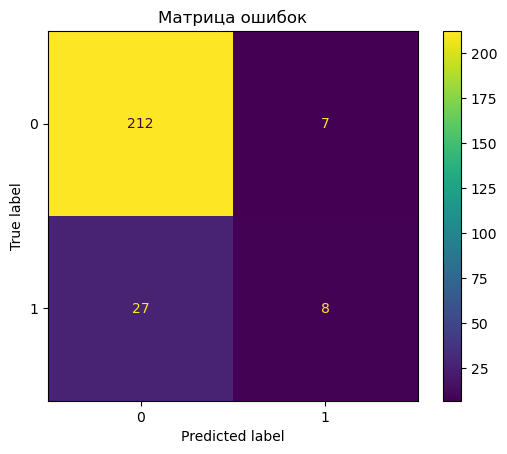

In [ ]:
matrix_lr = confusion_matrix(y_test, final_tune_lr.predict(X_test))

disp_lr = ConfusionMatrixDisplay(confusion_matrix=matrix_lr)

fig, ax = plt.subplots()
disp_lr.plot(ax=ax, cmap=plt.cm.viridis, values_format=".0f")

ax.grid(False)

plt.title("Матрица ошибок")
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=5)
precision_scorer = make_scorer(precision_score, zero_division=0)
scores_lr = cross_val_score(final_tune_lr, X, y, cv=cv, scoring=precision_scorer)
scores_lr

array([0.35714286, 0.6       , 0.5       , 0.75      , 0.85714286])

In [377]:
scores_lr.std()

0.17707371922681334

In [378]:
scores_lr.mean()

0.6128571428571429

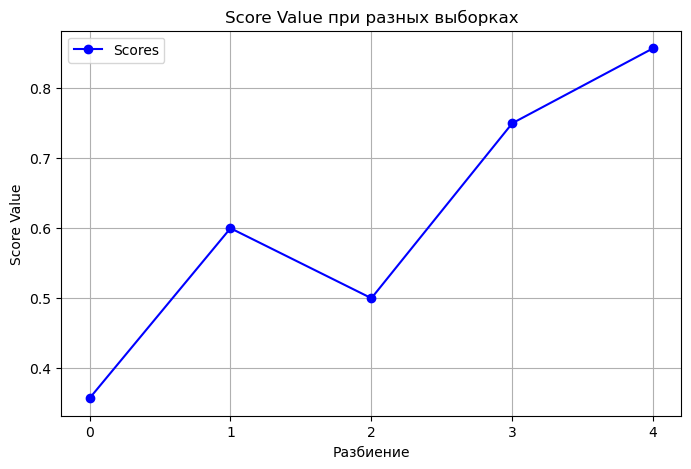

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(
    range(len(scores_lr)),
    scores_lr,
    marker="o",
    linestyle="-",
    color="b",
    label="Scores",
)
plt.title("Score Value при разных выборках")
plt.xlabel("Разбиение")
plt.ylabel("Score Value")
plt.grid(True)
plt.legend()

plt.xticks(ticks=range(len(scores)))

plt.show()

## Метод опорных векторов

In [ ]:
precision_scorer = make_scorer(precision_score, zero_division=0)

pipe_svm = Pipeline([("preprocessing", StandardScaler()), ("classifier", svm.SVC())])

C = np.linspace(0.2, 2, 10)
gamma = np.linspace(0.001, 0.2, 10)
kernals = ["linear", "poly", "rbf", "sigmoid"]

param_grid = [
    {
        "preprocessing": [StandardScaler()],
        "classifier": [svm.SVC()],
        "classifier__C": C,
        "classifier__gamma": gamma,
        "classifier__kernel": kernals,
    }
]

grid_svm = GridSearchCV(
    pipe_svm, param_grid, cv=5, scoring=precision_scorer, return_train_score=True
)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
                          'classifier__gamma': array([0.001     , 0.02311111, 0.04522222, 0.06733333, 0.08944444,
       0.11155556, 0.13366667, 0.15577778, 0.17788889, 0.2       ]),
                          'classifier__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid'],
                          'preprocessing': [StandardScaler()]}],
             return_train_score=True,
             scoring=make_scorer(precision_score, response_method='predict', zero_division=0))

In [ ]:
grid_result_svm = (
    pd.DataFrame(grid_svm.cv_results_)
    .sort_values(["rank_test_score", "std_test_score"])
    .T
)
grid_result_svm

,74,102,290,98,210,138,250,118,182,70,...,243,281,282,283,321,322,323,361,362,363
mean_fit_time,0.011186,0.009663,0.008597,0.009283,0.009805,0.009386,0.009019,0.011448,0.00976,0.010612,...,0.008028,0.006502,0.008555,0.008038,0.006519,0.008336,0.008036,0.006733,0.008536,0.007776
std_fit_time,0.000486,0.000274,0.000094,0.000082,0.001349,0.000123,0.000207,0.000286,0.000246,0.000212,...,0.000105,0.000086,0.000127,0.000119,0.000091,0.000265,0.000144,0.000107,0.000212,0.000136
mean_score_time,0.003855,0.00341,0.003085,0.003332,0.003282,0.003336,0.003088,0.004002,0.003422,0.003683,...,0.002443,0.002185,0.002889,0.002442,0.002174,0.002899,0.002472,0.002231,0.00289,0.002375
std_score_time,0.000083,0.000083,0.00003,0.000023,0.000249,0.000046,0.00003,0.000108,0.000078,0.000088,...,0.000029,0.00003,0.000052,0.000027,0.000024,0.00007,0.000038,0.000013,0.000039,0.000014
param_classifier,SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),...,SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC()
param_classifier__C,0.4,0.6,1.6,0.6,1.2,0.8,1.4,0.6,1.0,0.4,...,1.4,1.6,1.6,1.6,1.8,1.8,1.8,2.0,2.0,2.0
param_classifier__gamma,0.177889,0.111556,0.045222,0.089444,0.045222,0.089444,0.045222,0.2,0.111556,0.155778,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
param_classifier__kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,sigmoid,poly,rbf,sigmoid,poly,rbf,sigmoid,poly,rbf,sigmoid
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler()
params,"{'classifier': SVC(), 'classifier__C': 0.4, 'c...","{'classifier': SVC(), 'classifier__C': 0.60000...","{'classifier': SVC(), 'classifier__C': 1.6, 'c...","{'classifier': SVC(), 'classifier__C': 0.60000...","{'classifier': SVC(), 'classifier__C': 1.2, 'c...","{'classifier': SVC(), 'classifier__C': 0.8, 'c...","{'classifier': SVC(), 'classifier__C': 1.40000...","{'classifier': SVC(), 'classifier__C': 0.60000...","{'classifier': SVC(), 'classifier__C': 1.0, 'c...","{'classifier': SVC(), 'classifier__C': 0.4, 'c...",...,"{'classifier': SVC(), 'classifier__C': 1.40000...","{'classifier': SVC(), 'classifier__C': 1.6, 'c...","{'classifier': SVC(), 'classifier__C': 1.6, 'c...","{'classifier': SVC(), 'classifier__C': 1.6, 'c...","{'classifier': SVC(), 'classifier__C': 1.8, 'c...","{'classifier': SVC(), 'classifier__C': 1.8, 'c...","{'classifier': SVC(), 'classifier__C': 1.8, 'c...","{'classifier': SVC(), 'classifier__C': 2.0, 'c...","{'classifier': SVC(), 'classifier__C': 2.0, 'c...","{'classifier': SVC(), 'classifier__C': 2.0, 'c..."


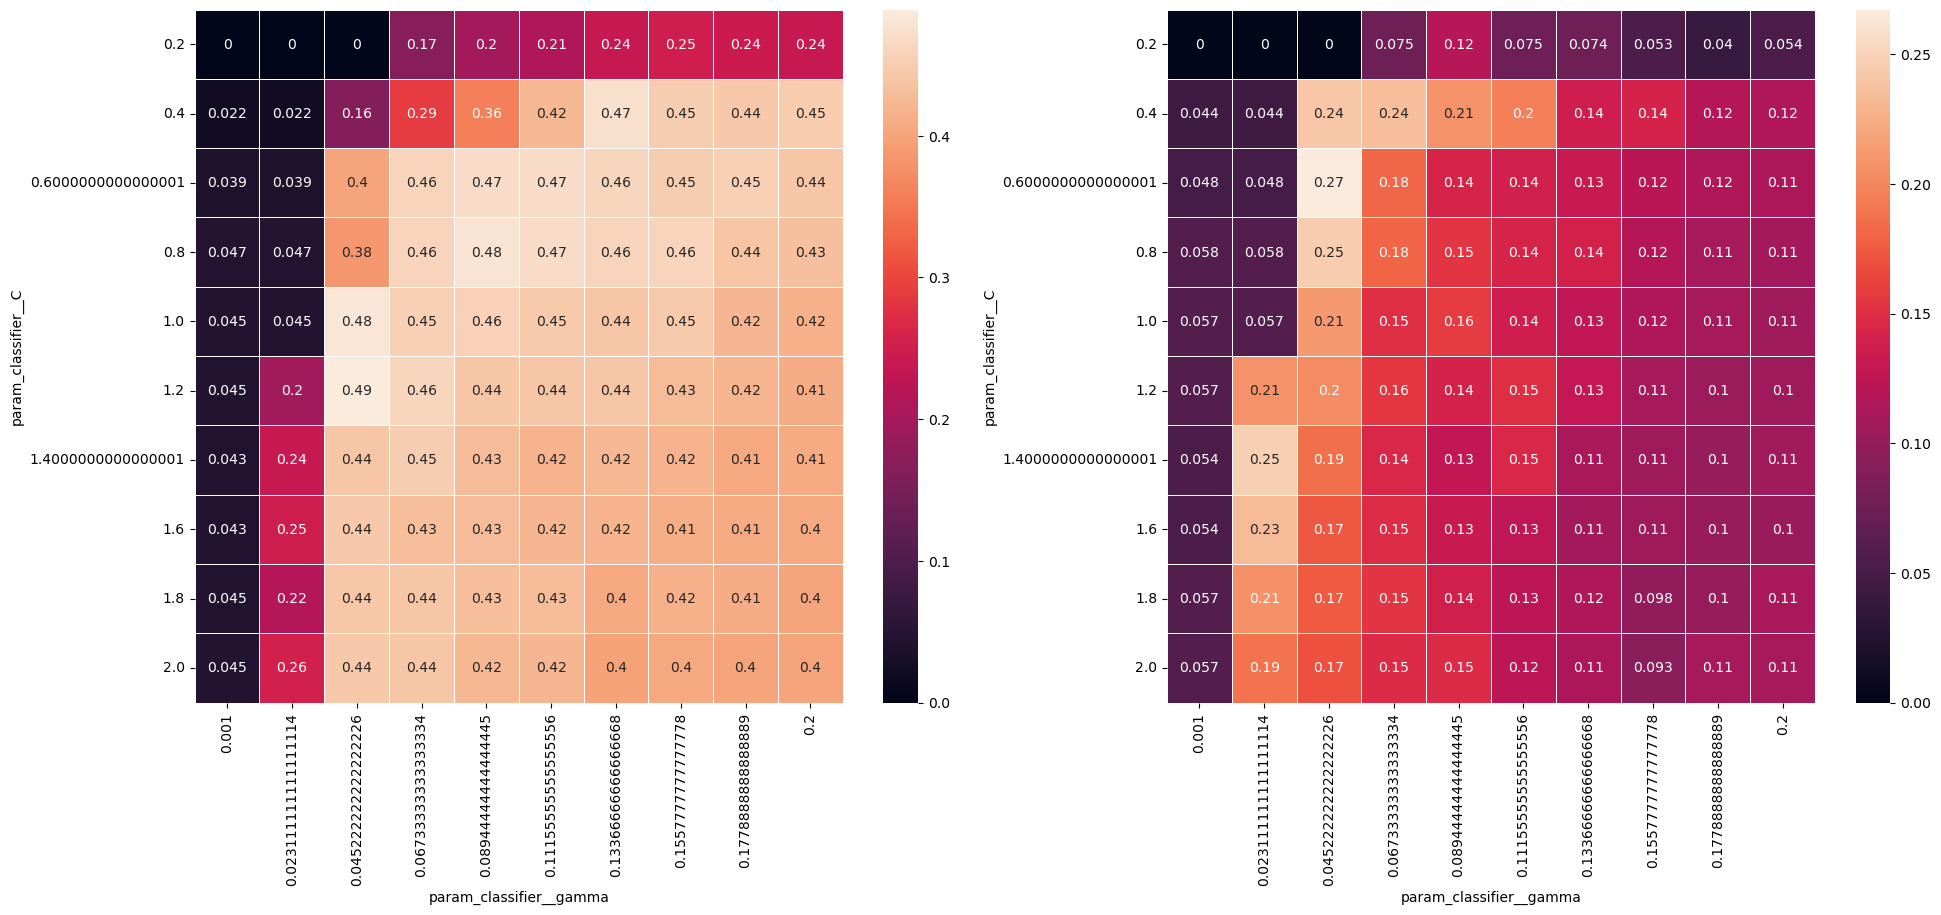

In [ ]:
pv_table = table.pivot_table(
    index="param_classifier__C",
    columns="param_classifier__gamma",
    values="mean_test_score",
)
pv_table_std = table.pivot_table(
    index="param_classifier__C",
    columns="param_classifier__gamma",
    values="std_test_score",
)
pv_table
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 9))


sns.heatmap(pv_table, annot=True, linewidths=0.5, ax=ax1)
sns.heatmap(pv_table_std, annot=True, linewidths=0.5, ax=ax2)

In [ ]:
pipe_best_svm = make_pipeline(
    StandardScaler(), svm.SVC(C=1.6, gamma=0.045222, kernel="rbf")
)
pipe_best_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1.6, gamma=0.045222))])

In [ ]:
print(
    "Precision в выбранной модельке:",
    precision_score(y_test, pipe_best_svm.predict(X_test), zero_division=0),
)

Precision в выбранной модельке: 0.5555555555555556


In [ ]:
print("ROC-AUC score:", roc_auc_score(y_test, pipe_best_svm.decision_function(X_test)))

ROC-AUC score: 0.8208741030658839


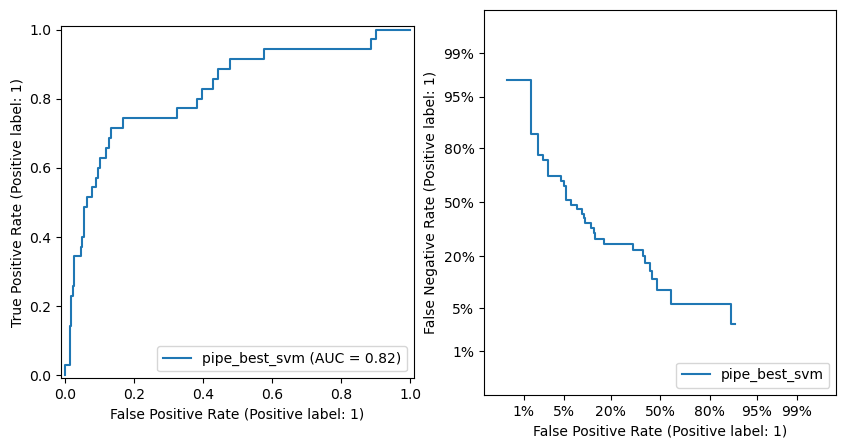

In [ ]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 5))
RocCurveDisplay.from_estimator(
    pipe_best_svm, X_test, y_test, ax=ax_roc, name="pipe_best_svm"
)
DetCurveDisplay.from_estimator(
    pipe_best_svm, X_test, y_test, ax=ax_det, name="pipe_best_svm"
)

In [ ]:
cv_scores = ["train_precision", "test_precision"]

precision_scorer = make_scorer(precision_score, zero_division=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
cv_results_model_origin_svm = pd.DataFrame(
    cross_validate(
        pipe_best_svm,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_origin_svm[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,0.840468,0.075247
test_precision,0.634996,0.245243


In [ ]:
model_tuned_svm = TunedThresholdClassifierCV(
    estimator=pipe_best_svm, scoring="precision"
)

precision_scorer = make_scorer(precision_score, zero_division=0)

cv_results_model_tuned_svm = pd.DataFrame(
    cross_validate(
        model_tuned_svm,
        X_train,
        y_train,
        scoring={"precision": precision_scorer},
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1,
    )
)
cv_results_model_tuned_svm[cv_scores].agg(["mean", "std"]).T

,mean,std
train_precision,0.891851,0.083951
test_precision,0.626048,0.308808


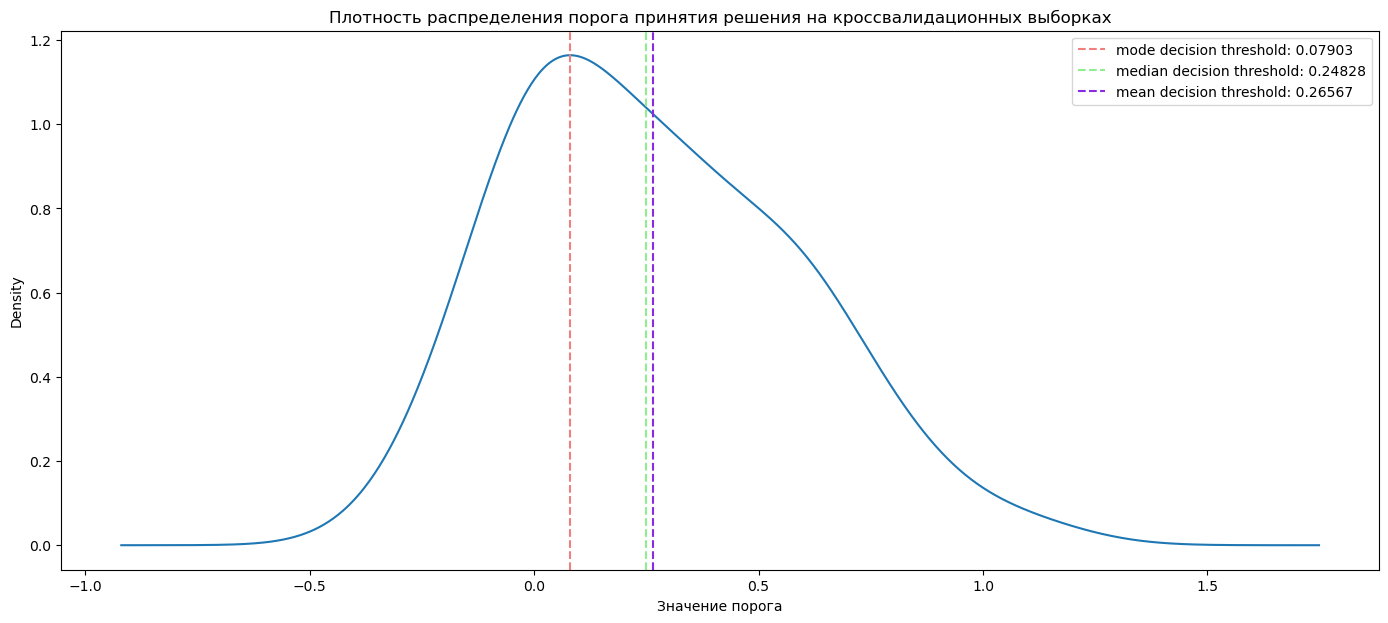

In [ ]:
decision_threshold_svm = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned_svm["estimator"]],
)

fig, ax = plt.subplots(figsize=(17, 7))

ax = decision_threshold_svm.plot.kde(bw_method="silverman")
line = ax.get_lines()
x_plt, y_plt = line[0].get_data()

ths = {
    "mode": [x_plt[np.argmax(y_plt)], "lightcoral"],
    "median": [decision_threshold_svm.median(), "lightgreen"],
    "mean": [decision_threshold_svm.mean(), "blueviolet"],
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("Значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках"
)

In [ ]:
ths_final_svm = {
    "origin": 0.5,
    "mode": x_plt[np.argmax(y_plt)],
    "median": decision_threshold_svm.median(),
    "mean": decision_threshold_svm.mean(),
}
comparison_svm = pd.DataFrame()
for key in ths_final_svm:
    final_tune_svm = FixedThresholdClassifier(
        pipe_best_svm, threshold=ths_final_svm[key]
    ).fit(X_train, y_train)
    comparison_svm.loc[key, "train"] = precision_score(
        y_train, final_tune_svm.predict(X_train), zero_division=0
    )
    comparison_svm.loc[key, "test"] = precision_score(
        y_test, final_tune_svm.predict(X_test), zero_division=0
    )

comparison_svm.sort_values(by="test")

,train,test
median,0.833333,0.500000
mean,0.826087,0.500000
mode,0.781250,0.571429
origin,0.944444,1.000000


In [ ]:
final_tune_svm = FixedThresholdClassifier(
    pipe_best_svm, threshold=ths_final_svm["origin"]
).fit(X_train, y_train)

In [ ]:
print("Метрики для нашей модели с выбранным порогом")
print(classification_report(y_test, final_tune_svm.predict(X_test)))

Метрики для нашей модели с выбранным порогом
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       219
           1       1.00      0.03      0.06        35

    accuracy                           0.87       254
   macro avg       0.93      0.51      0.49       254
weighted avg       0.88      0.87      0.81       254



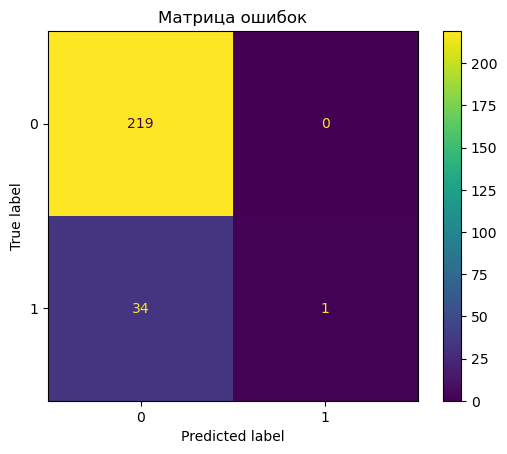

In [ ]:
matrix_svm = confusion_matrix(y_test, final_tune_svm.predict(X_test))

disp_svm = ConfusionMatrixDisplay(confusion_matrix=matrix_svm)

fig, ax = plt.subplots()
disp_svm.plot(ax=ax, cmap=plt.cm.viridis, values_format=".0f")

ax.grid(False)

plt.title("Матрица ошибок")
plt.show()

Проверим на разных разбиениях

In [ ]:
cv = StratifiedKFold(n_splits=5)
precision_scorer = make_scorer(precision_score, zero_division=0)
scores_svm = cross_val_score(final_tune_svm, X, y, cv=cv, scoring=precision_scorer)
scores_svm

array([0.75, 1.  , 0.5 , 1.  , 1.  ])

In [411]:
scores_svm.std()

0.2

In [412]:
scores_svm.mean()

0.85

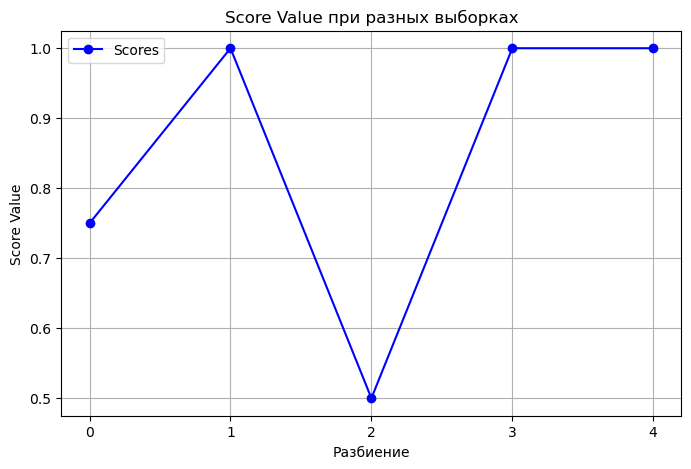

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(
    range(len(scores_svm)),
    scores_svm,
    marker="o",
    linestyle="-",
    color="b",
    label="Scores",
)
plt.title("Score Value при разных выборках")
plt.xlabel("Разбиение")
plt.ylabel("Score Value")
plt.grid(True)
plt.legend()

plt.xticks(ticks=range(len(scores)))

plt.show()

Будем использовать вот эту модельку!!! В среднем она выдает самые высокие результаты по Precision.